In [2]:
pip install selenium


  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)
Note: you may need to restart the kernel to use updated packages.


What do you want to search for?  normal 9 yr old handwriting
How many images do you want?  60






















https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOp8QfD3vu_XKVDxVXqqrfg7BC8ny-3anqng&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQT8Dwjt0KvseI1CIIS6lxSUpnMwNUUugtHzA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmP-MlfKKPMav7vHu_AvTbgrDJ-JubJsp4cQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvcIecAZaUDEUYUwz0I2QCqPa6Db91B0qZ7g&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQa29LaJ-hvAaRAszfAAOUXG6csNzgVbNU4WhD0oxHz_JIpYCO&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFHWIY_Q5P7J_yMPe6eqmR0x-h32kB5Z0BNF2-UUpCchiAyqDc&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQa29LaJ-hvAaRAszfAAOUXG6csNzgVbNU4WhD0oxHz_JIpYCO&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRn7KSO3yvuFSXrG56X6OBpd52kaLQ_T15Ew&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTn15AY77s3X5xPbL_UXWUa9hj8VcWlB-W7TQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/ima
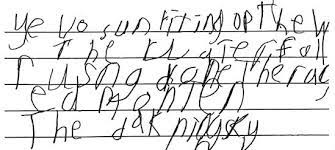
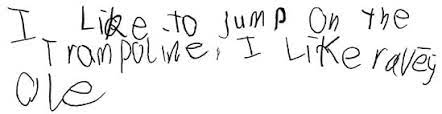
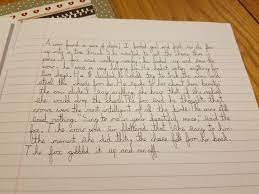
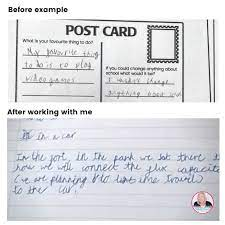
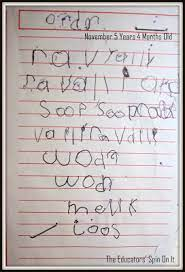
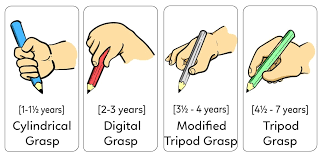
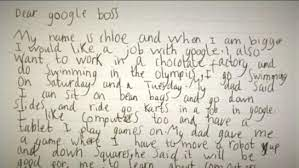
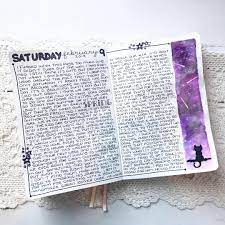
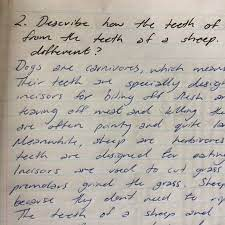
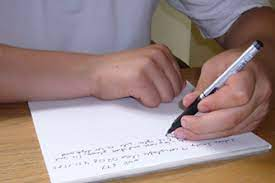
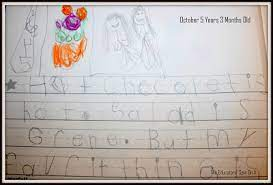
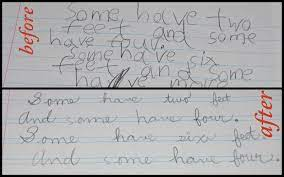
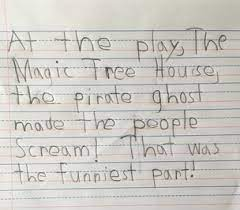
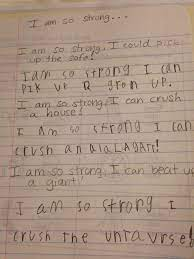
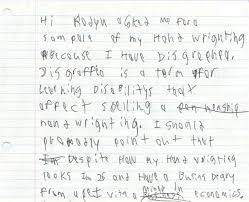
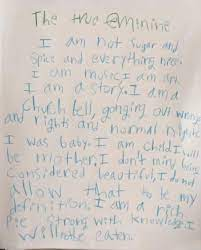
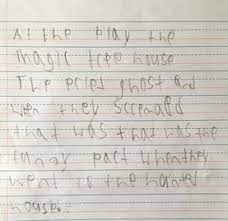
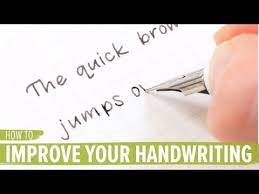
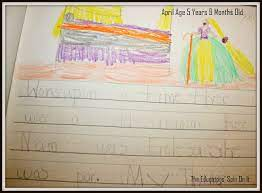
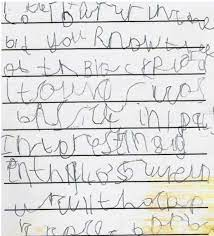

In [25]:
from selenium import webdriver
import os
import urllib
import time

path = r'C:\Users\sseng\Downloads\chromedriver_win32.zip\chromedriver.exe'



url_prefix = "https://www.google.com.sg/search?q="
url_postfix = "&source=lnms&tbm=isch&sa=X&ei=0eZEVbj3IJG5uATalICQAQ&ved=0CAcQ_AUoAQ&biw=939&bih=591"

save_folder = 'Train Images'

def main():
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    download_images()
    
def download_images():
    topic = input("What do you want to search for? ")
    n_images = int(input('How many images do you want? '))
    
    search_url = url_prefix+topic+url_postfix
    #print(search_url)
    
    path = r'C:\Program Files (x86)\chromedriver.exe'
    
    driver = webdriver.Chrome(path)
    driver.get(search_url)
    
    value = 0
    for i in range(3):
        driver.execute_script("scrollBy("+ str(value) +",+1000);")
        value += 1000
        time.sleep(1)
    
    elem1 = driver.find_element_by_id('islmp')
    sub = elem1.find_elements_by_tag_name('img')
    
    count=0
    for j,i in enumerate(sub):
        if j < n_images:
            src = i.get_attribute('src')   
            try:
                if src != None:
                    src  = str(src)
                    print(src)
                    
                    urllib.request.urlretrieve(src, os.path.join(save_folder, topic+str(count)+'.jpg'))
                else:
                    raise TypeError
            except Exception as e:              #catches type error along with other errors
                print(f'fail with error {e}')
    
    driver.close()
    
if __name__ == "__main__":
    main()